In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Data Exploration
basic data exploration like shape, null value, data type

In [21]:
data = pd.read_csv('dataset/StudentsPerformance.csv')
data.sample(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
82,male,group A,some college,free/reduced,completed,50,47,54
80,female,group B,associate's degree,standard,none,47,49,50
783,female,group C,associate's degree,standard,completed,52,59,62
457,male,group D,associate's degree,free/reduced,none,53,54,48
992,female,group D,associate's degree,free/reduced,none,55,76,76
999,female,group D,some college,free/reduced,none,77,86,86
958,female,group D,high school,standard,none,45,63,59


In [22]:
data.shape

(1000, 8)

In [23]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [24]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [25]:
data = data.rename(columns={'race/ethnicity':'ethinic', 'parental level of education':'parent_education','test preparation course':'preparation'})

In [26]:
print(data['math score'].isnull().sum())

0


In [27]:
data['result'] = ((data['math score'] + data['reading score'] + data['writing score']) /300) * 100

In [28]:
data['result'] = data['result'].apply(lambda x: 1 if x > 50 else 0)
data.sample(6)

,gender,ethinic,parent_education,lunch,preparation,math score,reading score,writing score,result
72,female,group A,associate's degree,free/reduced,none,41,51,48,0
519,female,group B,high school,free/reduced,completed,67,78,79,1
572,female,group C,some college,standard,none,53,62,56,1
402,female,group A,some college,free/reduced,none,49,65,55,1
695,female,group D,some college,free/reduced,none,79,89,86,1
617,male,group D,bachelor's degree,standard,none,88,78,83,1


# Data Visualization

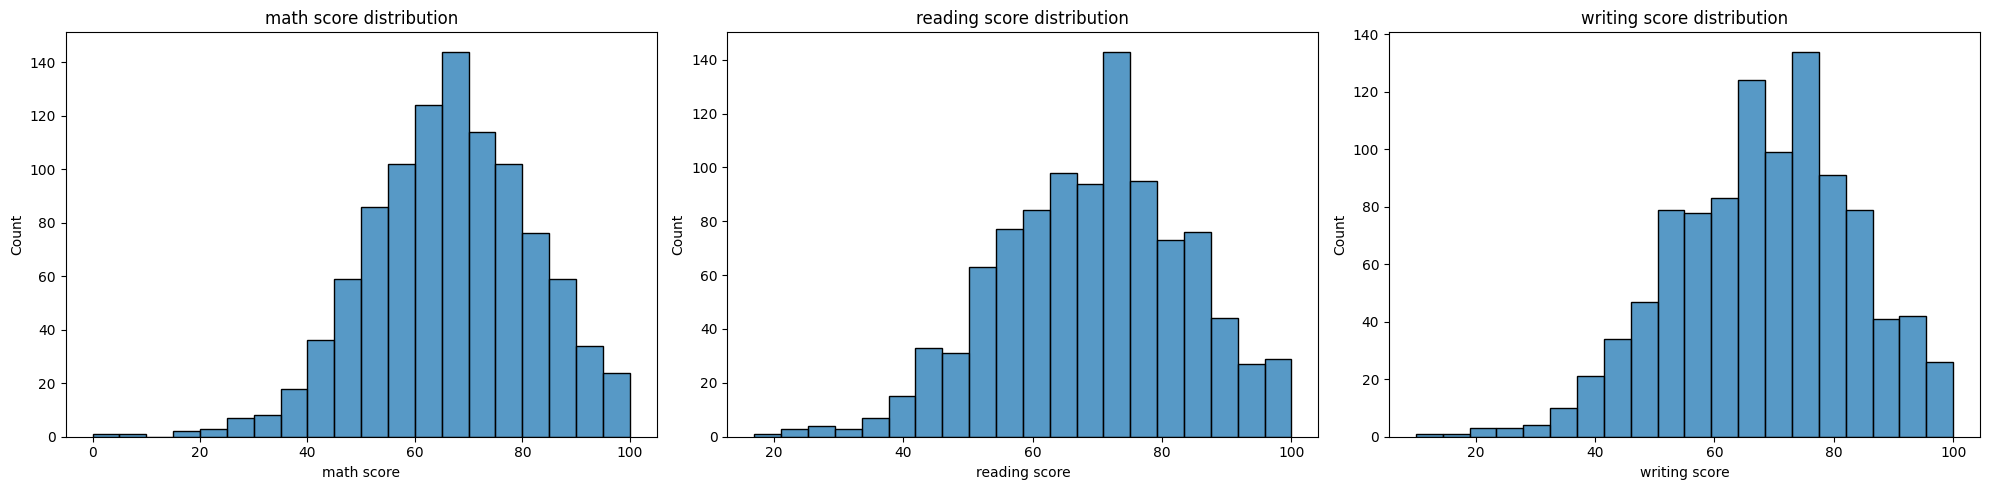

In [29]:
fig, axes = plt.subplots(1,3,figsize=(20,5))

# math score
sns.histplot(data['math score'], bins=20, ax=axes[0])
axes[0].set_title('math score distribution')

# reading score distribution
sns.histplot(data['reading score'], bins=20, ax=axes[1])
axes[1].set_title('reading score distribution')


sns.histplot(data['writing score'], bins=20, ax=axes[2])
axes[2].set_title('writing score distribution')

plt.tight_layout()
plt.show()

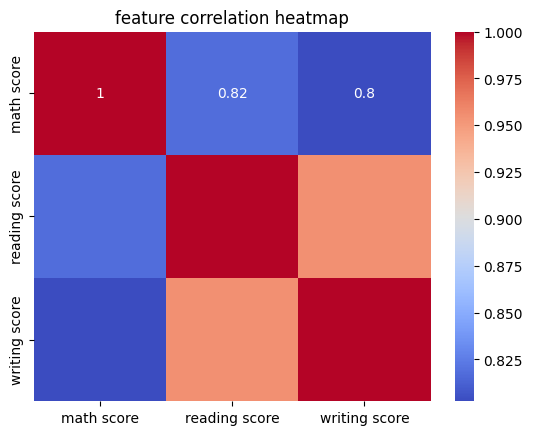

In [30]:
# correlation of each score col

corr = data[['math score','reading score','writing score']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('feature correlation heatmap')
plt.show()

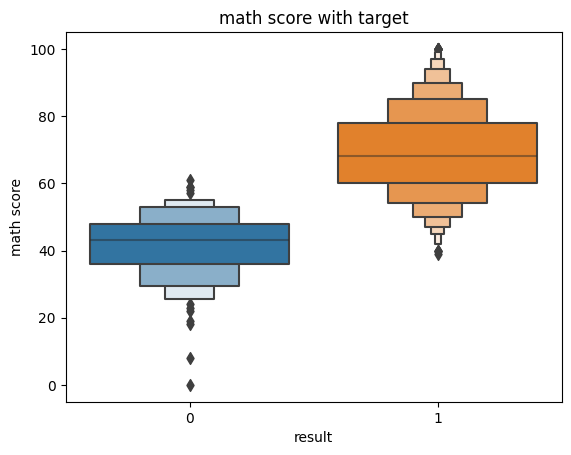

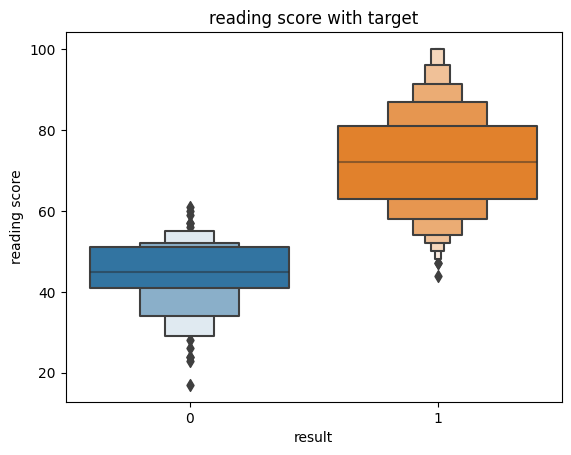

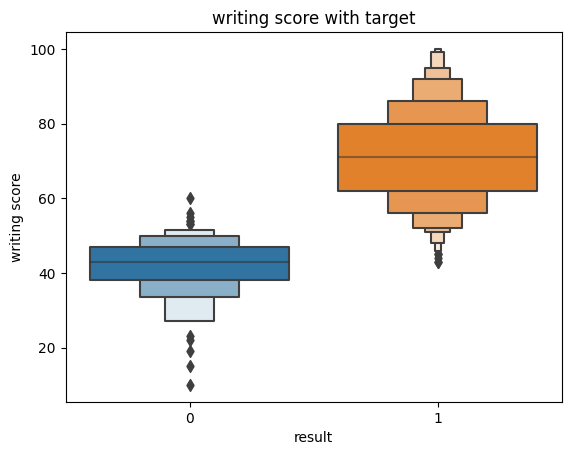

In [31]:
# relationship with targetvalue(pass/fail)

sns.boxenplot(x='result', y ='math score', data=data)
plt.title('math score with target')
plt.show()

sns.boxenplot(x='result', y ='reading score', data=data)
plt.title('reading score with target')
plt.show()

sns.boxenplot(x='result', y ='writing score', data=data)
plt.title('writing score with target')
plt.show()



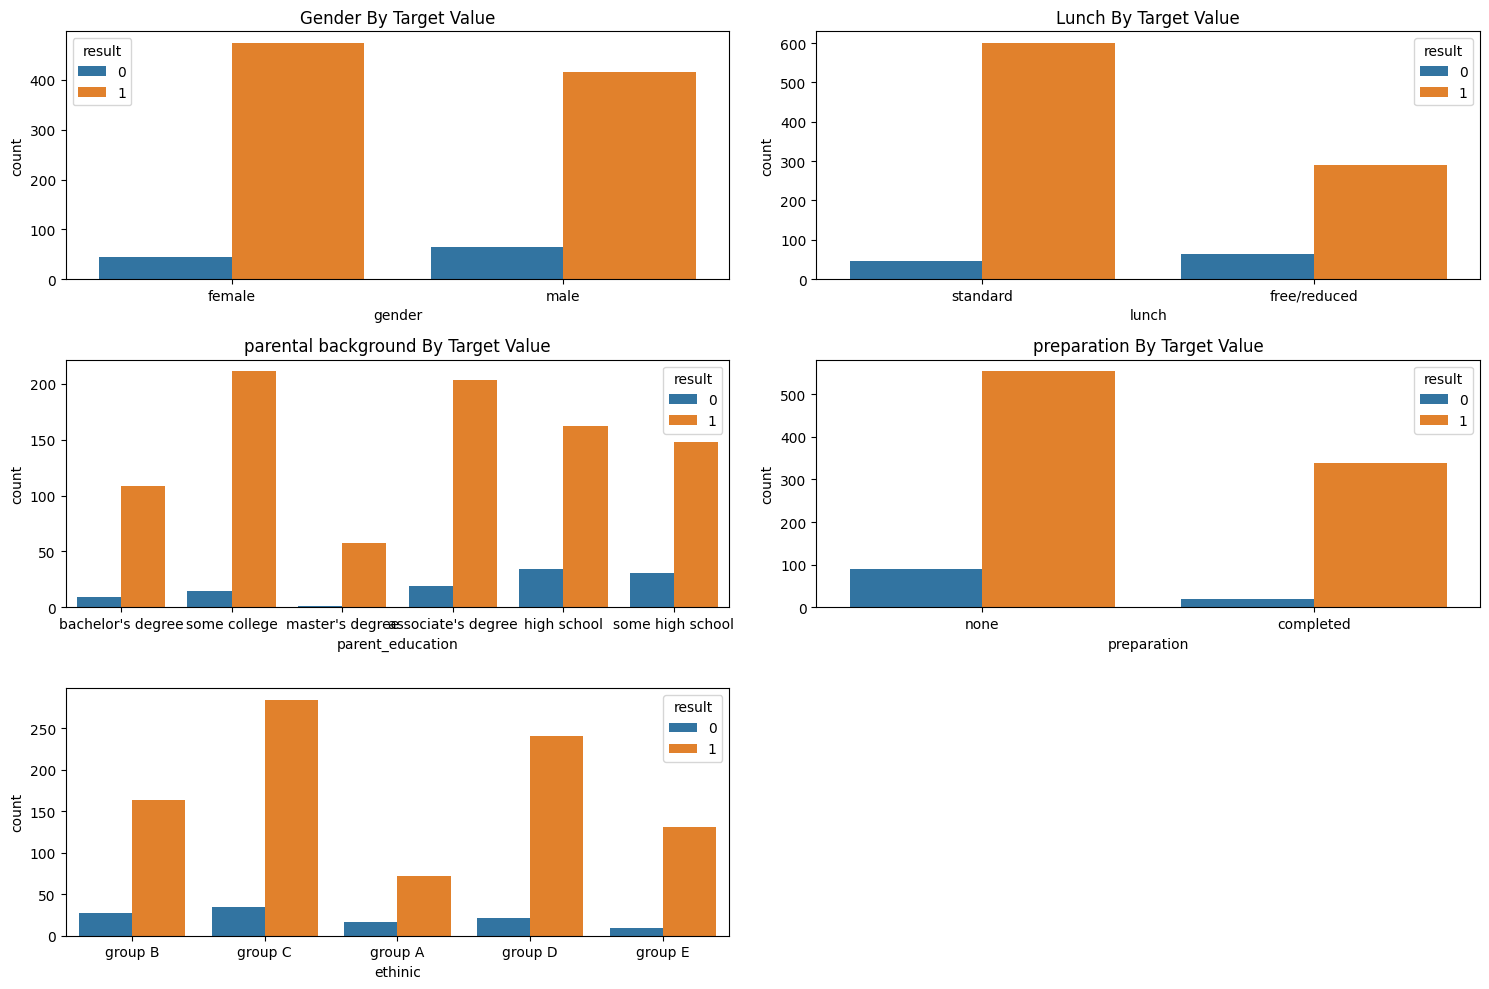

In [32]:
fig, axes = plt.subplots(3,2, figsize=(15,10))

# for gender
sns.countplot(x='gender', hue='result', data=data, ax=axes[0, 0])
axes[0,0].set_title('Gender By Target Value')

# for Lunch
sns.countplot(x='lunch', hue='result',data=data, ax=axes[0,1])
axes[0,1].set_title('Lunch By Target Value')

# for parental background
sns.countplot(x='parent_education', hue='result',data=data, ax=axes[1,0])
axes[1,0].set_title('parental background By Target Value')

# for ethinic
sns.countplot(x='preparation', hue='result',data=data, ax=axes[1,1])
axes[1,1].set_title('preparation By Target Value')

# 
sns.countplot(x='ethinic', hue='result',data=data, ax=axes[2,0])
axes[1,1].set_title('preparation By Target Value')

fig.delaxes(axes[2,1])
plt.tight_layout()
plt.show()

# Data Preprocessing
encode catagorical data

In [33]:
data.head()

,gender,ethinic,parent_education,lunch,preparation,math score,reading score,writing score,result
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1


In [34]:
data = pd.get_dummies(data, columns=[
    'ethinic',
    'parent_education'
], drop_first=False)

In [35]:
data = pd.get_dummies(data, columns=[
    'gender',
    'lunch',
    'preparation'
], drop_first=True)

In [36]:
final_data = data.rename(columns={'gender_male':'gender', 'ethinic_group A':'group_A','ethinic_group B':'group_B','ethinic_group C':'group_C','ethinic_group D':'group_D','ethinic_group E':'group_E','preparation_none':'preparation',"parent_education_bachelor's degree":'bachelor',"parent_education_high school":'high_school',"parent_education_master's degree":'master',"parent_education_some college":'some_college',"parent_education_some high school":'some_school',"parent_education_associate's degree":'associate'})

In [37]:
final_data['result'].value_counts()

1    891
0    109
Name: result, dtype: int64

In [40]:
final_data.head(10)

,math score,reading score,writing score,result,group_A,group_B,group_C,group_D,group_E,associate,bachelor,high_school,master,some_college,some_school,gender,lunch_standard,preparation
0,72,72,74,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1
1,69,90,88,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,90,95,93,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1
3,47,57,44,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
4,76,78,75,1,0,0,1,0,0,0,0,0,0,1,0,1,1,1
5,71,83,78,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1
6,88,95,92,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0
7,40,43,39,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
8,64,64,67,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
9,38,60,50,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


# Imbalanced set of output
Well we get an imbalanced set of output from our data now model selection and training set needs to be assign carefully for training

In [41]:
final_data.to_csv('dataset/preprocessed_data.csv')

# Data spliting and training

In [42]:
x = final_data.drop('result', axis=1)
y = final_data['result']

x_train,x_test, y_train, y_test = train_test_split(x,y, train_size=0.8,  random_state=42, stratify=y)

In [43]:
x_train.shape

(800, 17)

In [44]:
y_test.shape

(200,)

In [45]:
model = LogisticRegression(class_weight='balanced',max_iter = 1000)
model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [46]:
y_pred = model.predict(x_test)

In [47]:
print('*************classification_report*******************\n')
print(classification_report(y_test,y_pred))
print('****************confusion matrix*********************\n')
print(confusion_matrix(y_test,y_pred))

*************classification_report*******************

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.99      1.00       178

    accuracy                           0.99       200
   macro avg       0.98      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

****************confusion matrix*********************

[[ 22   0]
 [  1 177]]


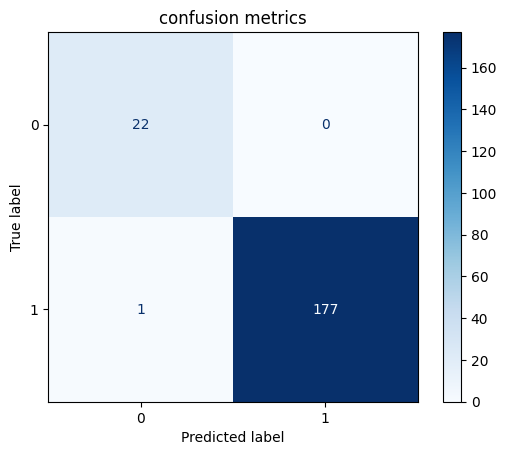

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, cmap='Blues')
plt.title('confusion metrics')
plt.show()

In [49]:
import joblib

In [50]:
# save the model
joblib.dump(model,'model.pkl')

['model.pkl']